# 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
 

#### 설명
- 결정트리 모델에 대해서 학습합니다.

In [47]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# 와인 데이터를 불러옵니다.
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [48]:
# describe 함수를 통해서 각 데이터셋의 평균, 표준편차등을 알 수 있습니다.
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [49]:
# 평균을 보니 데이터 스케일이 달라서 전처리를 해야겠군요!
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [50]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                      target,
                                                                      random_state=42,
                                                                      test_size=0.2)

In [51]:
# 5197개의 행이 있고, 3개의 특성 열이 있다는 의미입니다.
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [52]:
# 이진 분류이기 때문에 로지스틱 회귀를 사용해볼까요?
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [53]:
# 생각보다 낮은 결과값이 나오는군요. 그리드서치로 최적의 값을 한번 찾아보죠
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
params = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
gs = GridSearchCV(lr, param_grid=params, cv=5)
gs.fit(train_scaled, train_target)
print(gs.best_estimator_, gs.best_score_)

LogisticRegression(penalty='l1', solver='liblinear') 0.7814150070333901


In [54]:
# 최적의 모델로 학습을 시켜볼까요?
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(train_scaled, train_target)
pred_data = lr.predict(test_scaled)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [56]:
# 보시다시피 최적의 값으로 훈련을 시켜도 예측값이 낮다는 것을 알 수 있습니다.
# 분류 모델의 평가 지표인 f1 점수와, 혼동행렬을 한번 볼까요?
# f1 스코어는 (2*재현율*정밀도)/(재현율+정밀도)이고,
# 혼동행렬은   [[TN, FP],
          # [FN, TP]]입니다.
from sklearn.metrics import f1_score, confusion_matrix
f1 = f1_score(pred_data, test_target)
print(f1)
conf = confusion_matrix(pred_data, test_target)
print(conf)

0.859504132231405
[[127  75]
 [214 884]]


In [57]:
# 가중치와 절편의 값을 보고 어떻게 이 모델이 구현되었는지 알 수 있을 까요?
print(lr.coef_, lr.intercept_)

[[ 0.51184656  1.67386783 -0.68656127]] [1.81630128]


In [58]:
# 이때 나오는게 결정트리입니다. 직관적이고 데이터를 전처리하지 않아도 되죠.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42, criterion='gini')
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


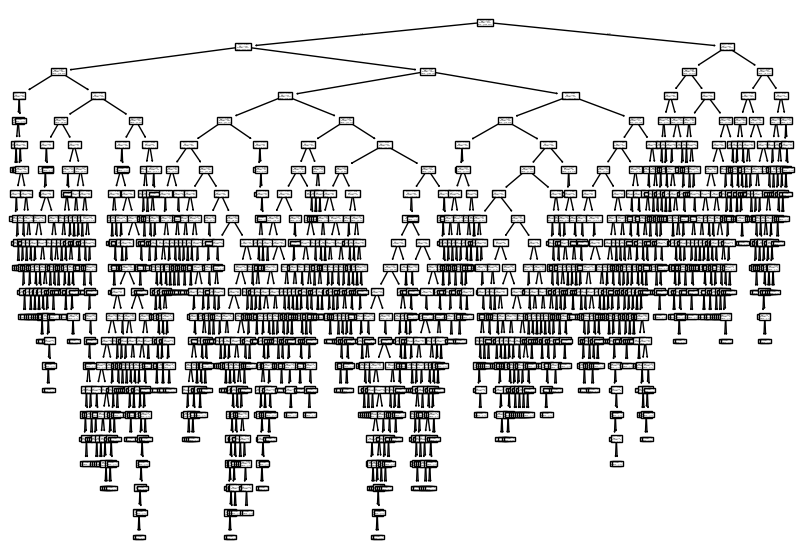

In [59]:
# 확실히 전에 있던 모델보다는 적합하긴 하지만, 보시면 훈련 데이터에 대한 점수가 너무 높은 것을 알 수 있죠.
# 그래프를 한번 그려볼까요?
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dtc)
plt.show()

[Text(0.5, 0.8333333333333334, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.5, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

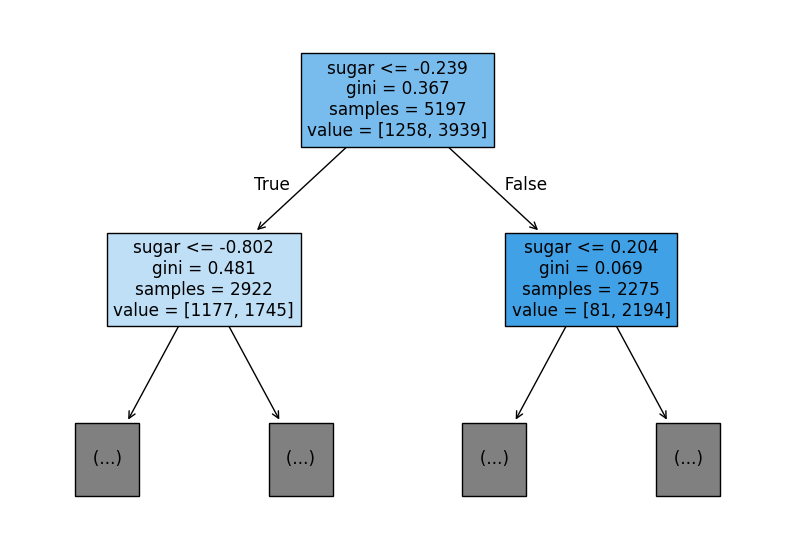

In [60]:
# 전체 그래프를 다 그리니깐 복잡하네요. 가장 윗 노드만 봐볼까요?
plt.figure(figsize=(10, 7))
plot_tree(dtc, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

In [61]:
# 3층까지만 훈련을 시켜보죠!
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(train_scaled, train_target)
print(dtc.score(train_scaled, train_target))
print(dtc.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


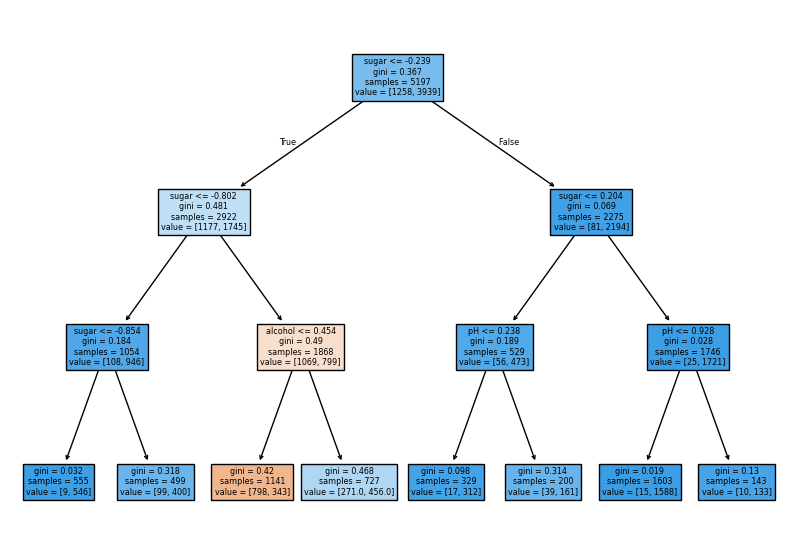

In [36]:
plt.figure(figsize=(10, 7))
plot_tree(dtc, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [62]:
# 최적의 해를 찾아볼까요?
import numpy as np
paramas = {
    'max_depth' : np.arange(1, 100)
}
dfc = DecisionTreeClassifier()
gs = GridSearchCV(dfc, param_grid=paramas, cv=5)
gs.fit(train_input, train_target)
print(gs.best_estimator_, gs.best_index_, gs.best_params_, gs.best_score_)

DecisionTreeClassifier(max_depth=np.int64(62)) 61 {'max_depth': np.int64(62)} 0.860880099207818


In [64]:
# max_depth를 바탕으로 점수에 대한 그래프를 그려볼게요.
train_score = []
test_score = []
max_value = np.arange(1, 100)
for i in max_value:
    dfc = DecisionTreeClassifier(max_depth=i)
    dfc.fit(train_input, train_target)
    train_score.append(dfc.score(train_input, train_target))
    test_score.append(dfc.score(test_input, test_target))

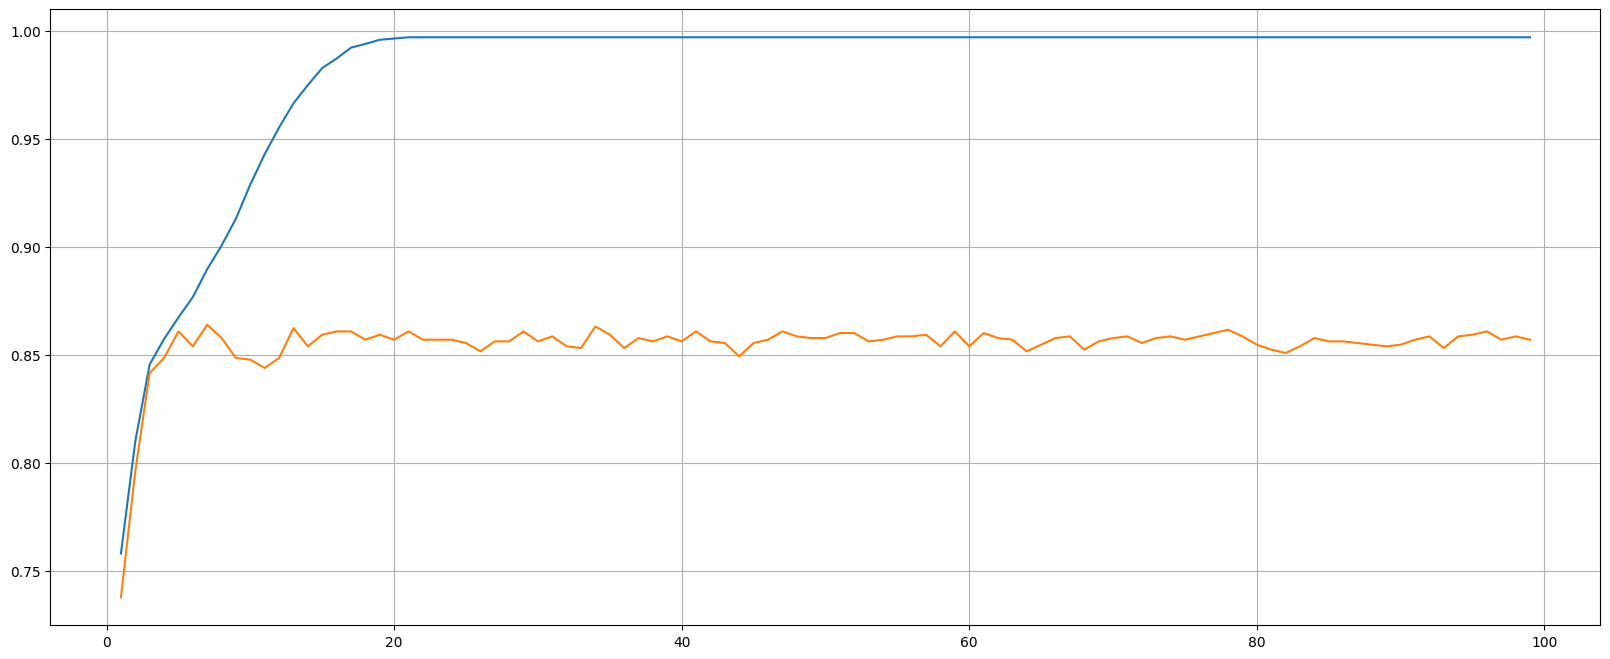

In [65]:
plt.figure(figsize=(20, 8))
plt.plot(max_value, train_score)
plt.plot(max_value, test_score)
plt.grid()
plt.show()

In [66]:
# 혹시 어떤게 보이시나요? 데이터가 10 이전까지는 훈련데이터와, 테스트 데이터의 차이가 별로 안나는데 어느순간부터는 차이도 많이나고, 
# 훈련데이터가 수렴하는거 보이시나요? 결증 트리는 훈련 데이터에 대해서 과적합이 발생하므로 적절한 깊이를 할당해야합니다!